# Explore here

In [32]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv',sep=';')

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [33]:
df['quality'].unique()

def quality_label(x):
    if x<5:
        label = 0
    elif x<7:
        label = 1
    else:
        label = 2
    return label

df['label'] = df['quality'].apply(quality_label)

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  label                 1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [35]:
df.drop(columns='quality',inplace=True)
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'label'],
      dtype='object')

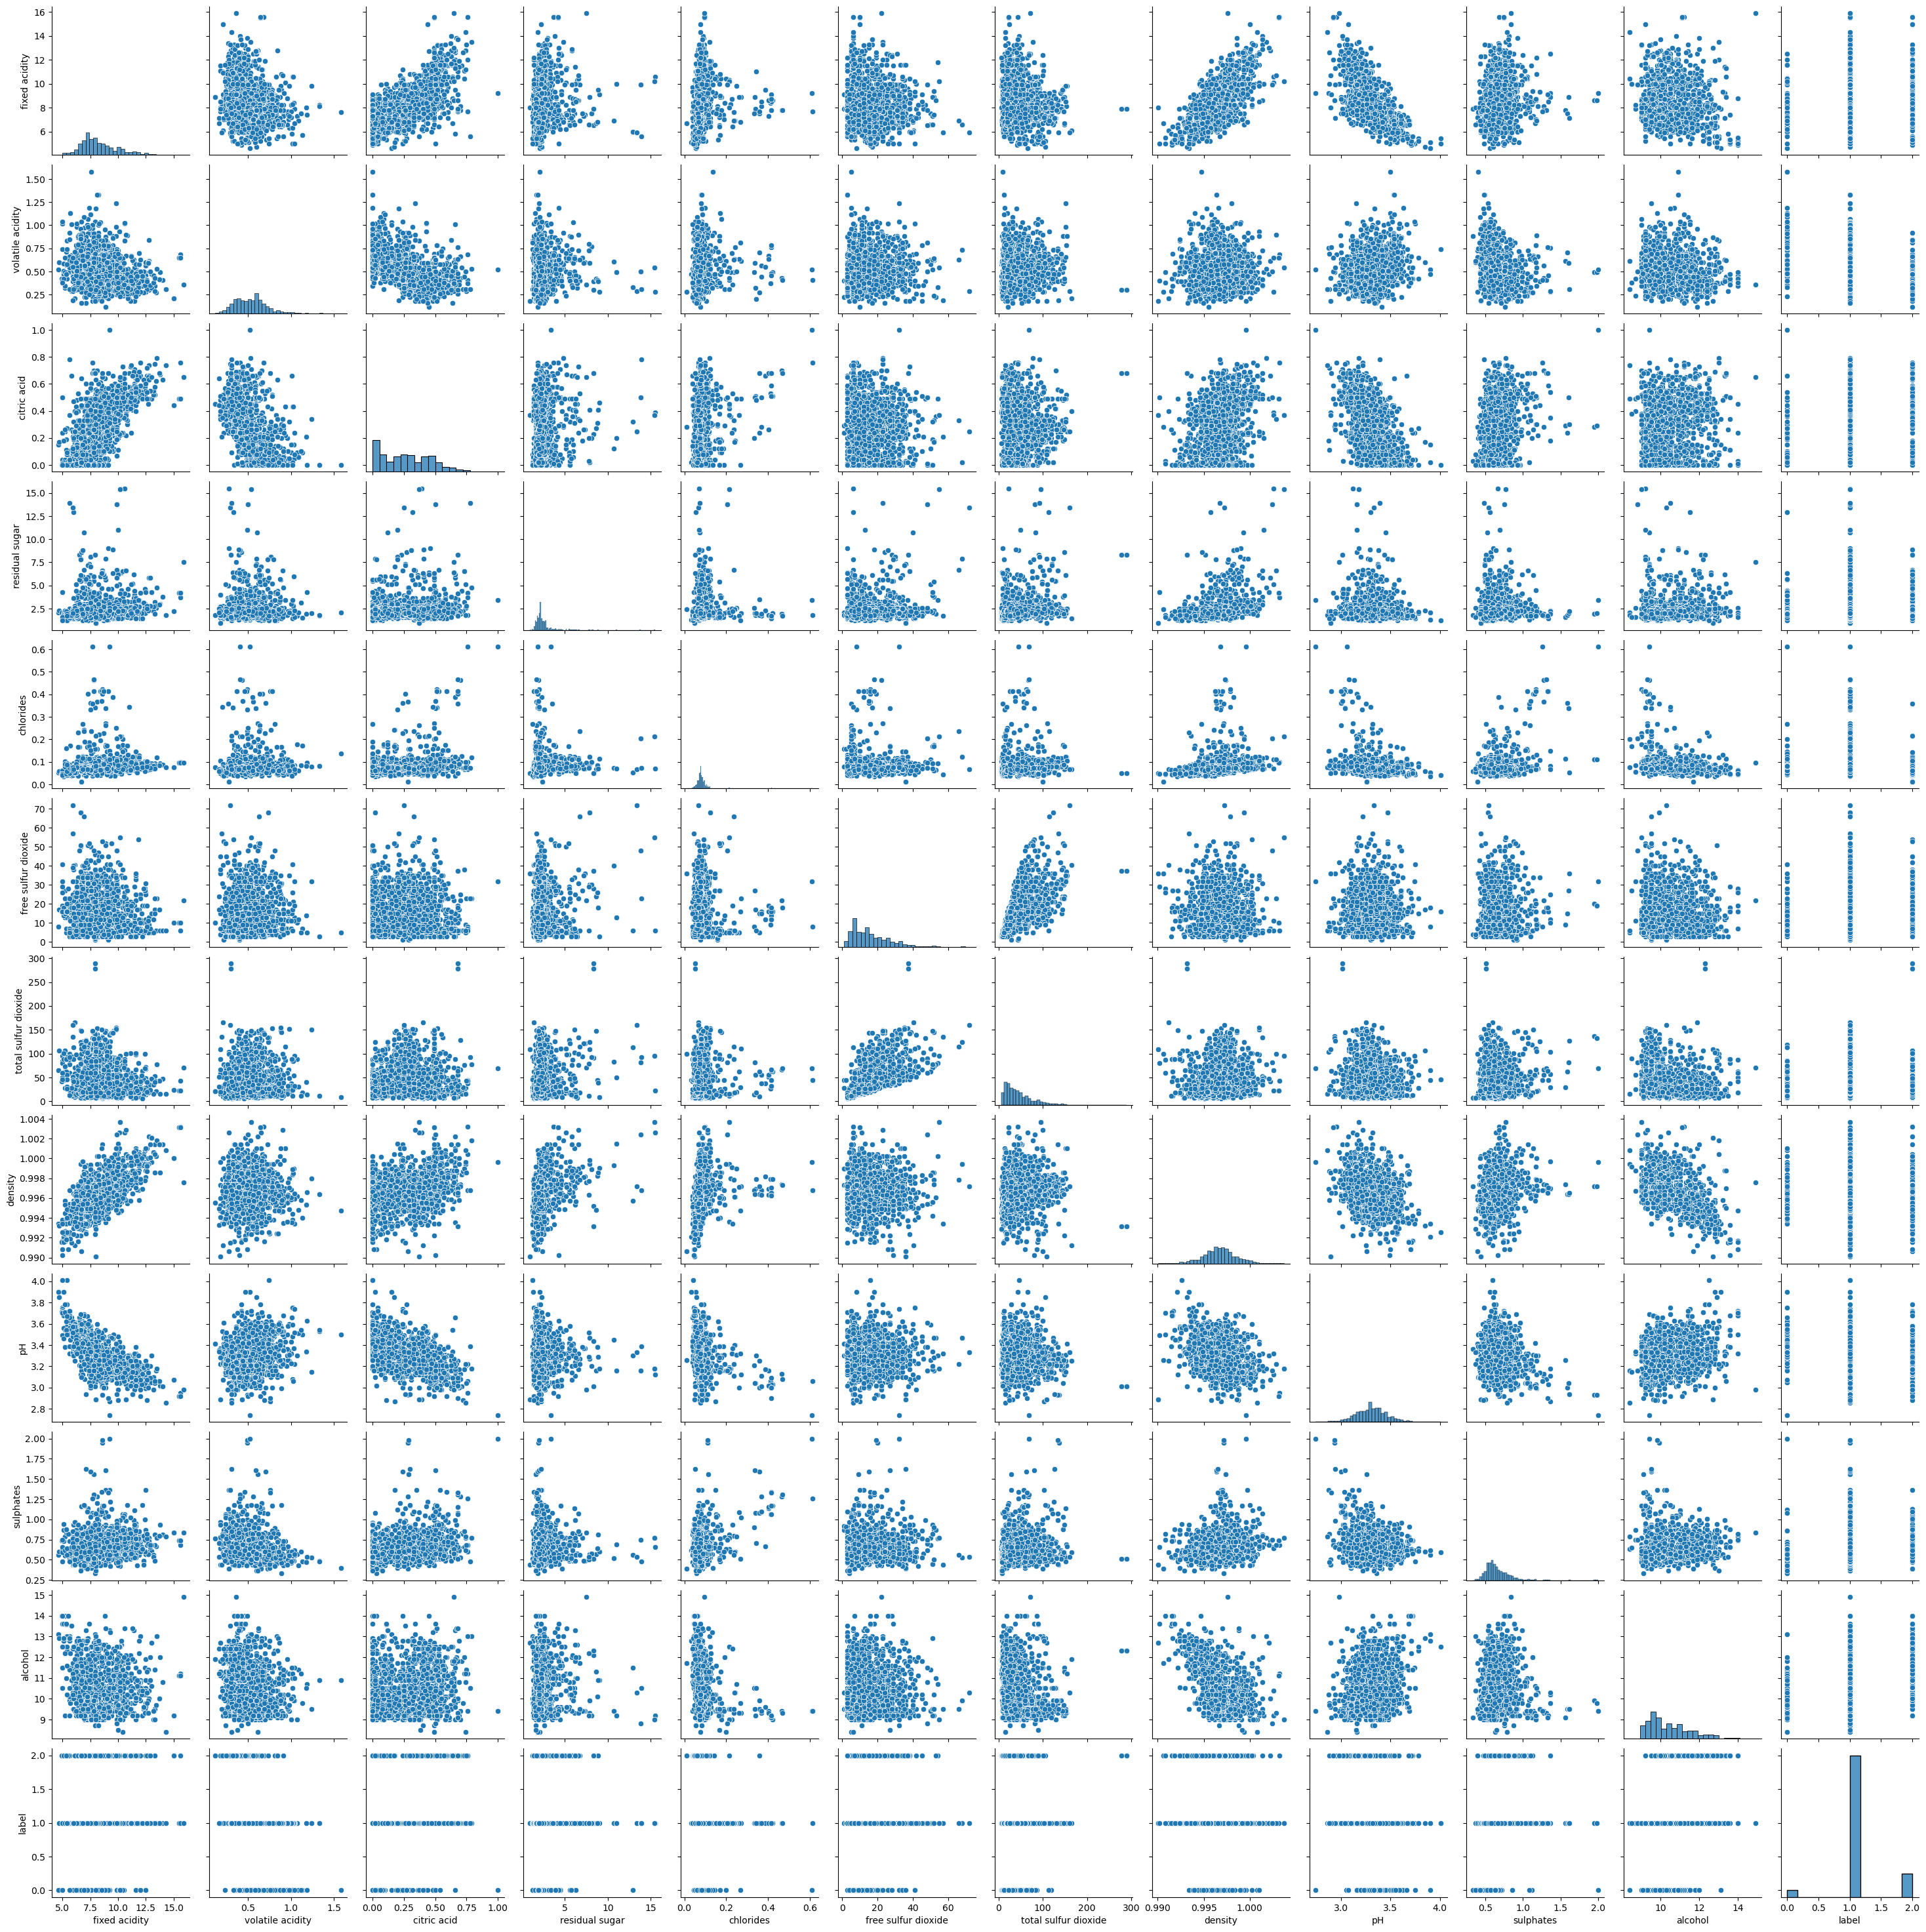

In [36]:
import seaborn as sns

sns.pairplot(df)

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(columns='label')
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
493,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4
705,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9
...,...,...,...,...,...,...,...,...,...,...,...
1130,9.1,0.600,0.00,1.9,0.058,5.0,10.0,0.99770,3.18,0.63,10.4
1294,8.2,0.635,0.10,2.1,0.073,25.0,60.0,0.99638,3.29,0.75,10.9
860,7.2,0.620,0.06,2.7,0.077,15.0,85.0,0.99746,3.51,0.54,9.5
1459,7.9,0.200,0.35,1.7,0.054,7.0,15.0,0.99458,3.32,0.80,11.9


In [38]:
scaler = StandardScaler()

X_train_esc = scaler.fit_transform(X_train, y_train)
X_test_esc = scaler.transform(X_test)

X_train_esc = pd.DataFrame(data=X_train_esc,columns=X_train.columns,index=X_train.index)
X_test_esc = pd.DataFrame(data=X_test_esc,columns=X_test.columns,index=X_test.index)

X_train_esc

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
493,0.218332,0.889712,0.192092,0.309726,-0.049642,0.691007,1.042934,1.846696,1.093500,0.458223,1.123177
354,-1.290166,-1.788783,0.652753,-0.805080,-0.455214,2.388473,3.593870,-3.004491,-0.400439,-0.401197,1.408272
342,1.494753,-0.784347,1.011045,-0.526378,0.599272,-0.957960,-0.991742,0.768655,-0.075669,0.515517,-0.587390
834,0.276351,0.861811,-0.063831,-0.665729,-0.009085,0.012020,-0.718427,0.089488,0.054238,-1.088733,-0.967516
705,0.044274,2.814880,-0.626861,2.399985,-0.313264,-0.472970,0.222990,1.199871,0.379008,-0.974144,-0.492358
...,...,...,...,...,...,...,...,...,...,...,...
1130,0.450408,0.387494,-1.394630,-0.456703,-0.617442,-1.054958,-1.113215,0.499144,-0.855116,-0.172018,-0.017201
1294,-0.071764,0.582801,-0.882784,-0.317352,-0.313264,0.885003,0.405199,-0.212363,-0.140623,0.515517,0.457957
860,-0.651956,0.499098,-1.087522,0.100700,-0.232149,-0.084978,1.164407,0.369779,1.288361,-0.687670,-0.872484
1459,-0.245822,-1.844584,0.396831,-0.596054,-0.698557,-0.860962,-0.961374,-1.182601,0.054238,0.801991,1.408272


In [39]:
X_train_esc.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03
mean,-1.111091e-16,4.117981e-16,1.263866e-16,1.527750e-17,-1.041648e-16,-7.638751e-17,-7.569308e-17,2.559398e-14,-1.358309e-15,4.152703e-16,4.777692e-16
std,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00
min,-2.160453e+00,-2.291000e+00,-1.394630e+00,-1.153456e+00,-1.550257e+00,-1.442950e+00,-1.234688e+00,-3.613585e+00,-3.713085e+00,-1.661679e+00,-1.917831e+00
25%,-7.099747e-01,-7.285451e-01,-8.827838e-01,-4.567030e-01,-3.538207e-01,-8.609621e-01,-7.487957e-01,-6.031534e-01,-6.602541e-01,-6.303756e-01,-8.724843e-01
50%,-2.458216e-01,-5.892147e-02,-6.383064e-02,-2.476770e-01,-1.713135e-01,-1.819756e-01,-2.629030e-01,1.402550e-02,-1.071561e-02,-2.293130e-01,-2.072638e-01
75%,5.084274e-01,6.107022e-01,8.063071e-01,3.102432e-02,5.175080e-02,4.970108e-01,4.963043e-01,5.773023e-01,5.738691e-01,4.009282e-01,6.480197e-01
max,4.395710e+00,5.856087e+00,3.723828e+00,9.019142e+00,1.059661e+01,5.055920e+00,7.359539e+00,3.727879e+00,4.536054e+00,7.677349e+00,4.259217e+00


In [40]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train_esc,y_train)

KNeighborsClassifier()

In [41]:
y_pred = model.predict(X_test_esc)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1,

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

accuracy_score(y_test,y_pred)

0.84375

In [43]:
confusion_matrix(y_test,y_pred)


array([[  0,  11,   0],
       [  1, 250,  11],
       [  0,  27,  20]])

<Axes: >

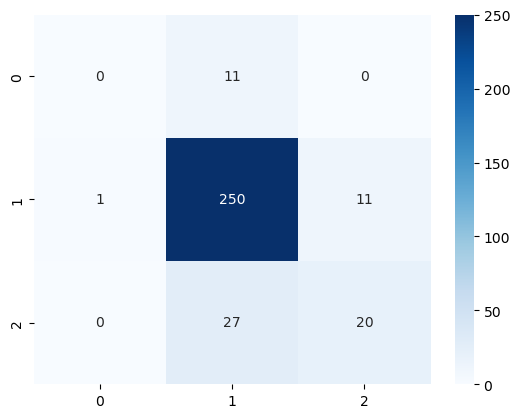

In [44]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')


In [45]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.87      0.95      0.91       262
           2       0.65      0.43      0.51        47

    accuracy                           0.84       320
   macro avg       0.50      0.46      0.47       320
weighted avg       0.81      0.84      0.82       320



In [46]:
from sklearn.metrics import recall_score

recall_score(y_test,y_pred,average='macro')

0.45991012939202

In [53]:
from imblearn.over_sampling import BorderlineSMOTE

SMOTE = BorderlineSMOTE(random_state=42,kind='borderline-1')
X_train_res, y_train_res = SMOTE.fit_resample(X_train_esc, y_train)

model_res = KNeighborsClassifier()
model_res.fit(X_train_res,y_train_res)
y_pred_res = model_res.predict(X_test_esc)
accuracy_score(y_test,y_pred_res)

0.7

<Axes: xlabel='label', ylabel='Count'>

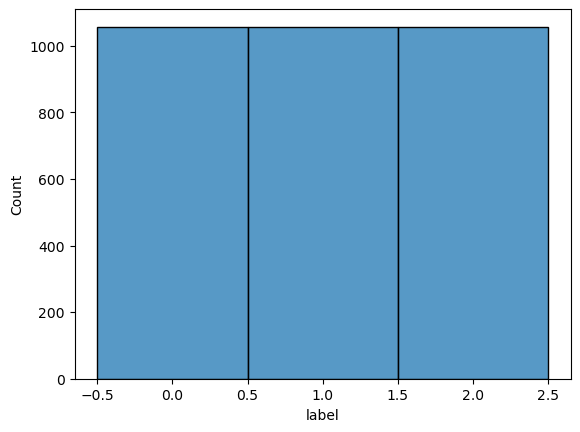

In [54]:
sns.histplot(y_train_res,discrete=True)


In [55]:
confusion_matrix(y_test,y_pred_res)


array([[  7,   4,   0],
       [ 24, 181,  57],
       [  0,  11,  36]])

esta matriz nos demuestra que no logramos balanceria para mejorar el modelo

Conclusion: Intentamos balancear la muestra que estabamos tomando y no logramos llegar a un balanceo ideal, esto signifca que no logramos mejorar el modelo

Las variables no generan una distincion definitiva sobre el resultado de las etiquetas, por lo que no pudimos balancear la muestra y el modelo inicial es mejor

Accuracy for k=1: 0.846875
Accuracy for k=2: 0.80625
Accuracy for k=3: 0.834375
Accuracy for k=4: 0.85
Accuracy for k=5: 0.84375
Accuracy for k=6: 0.85
Accuracy for k=7: 0.846875
Accuracy for k=8: 0.840625
Accuracy for k=9: 0.840625
Accuracy for k=10: 0.84375
Accuracy for k=11: 0.840625
Accuracy for k=12: 0.846875
Accuracy for k=13: 0.846875
Accuracy for k=14: 0.85625
Accuracy for k=15: 0.85625
Accuracy for k=16: 0.83125
Accuracy for k=17: 0.83125
Accuracy for k=18: 0.828125
Accuracy for k=19: 0.834375
Accuracy for k=20: 0.821875
Accuracy for k=21: 0.825
Accuracy for k=22: 0.825
Accuracy for k=23: 0.828125
Accuracy for k=24: 0.825
Accuracy for k=25: 0.8125
Accuracy for k=26: 0.8125
Accuracy for k=27: 0.809375
Accuracy for k=28: 0.821875
Accuracy for k=29: 0.821875
Accuracy for k=30: 0.825
Accuracy for k=31: 0.815625
Accuracy for k=32: 0.825
Accuracy for k=33: 0.81875
Accuracy for k=34: 0.815625
Accuracy for k=35: 0.81875
Accuracy for k=36: 0.825
Accuracy for k=37: 0.825
Accuracy for k=

<Axes: >

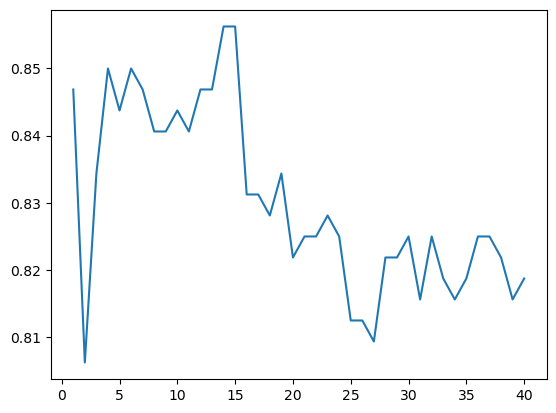

In [47]:
lista=[]
for k in range(1, 41):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_esc, y_train)
    y_pred = model.predict(X_test_esc)
    print(f'Accuracy for k={k}: {accuracy_score(y_test, y_pred)}')
    lista.append((accuracy_score(y_test, y_pred),k))

sns.lineplot(x=[x[1] for x in lista], y=[x[0] for x in lista])

In [48]:
def predict_wine_quality(features):
    features_esc = scaler.transform([features])
    prediction = model.predict(features_esc)
    if prediction[0] == 0:
        return "Bad quality wine"
    elif prediction[0] == 1:
        return "Medium quality wine"
    else: 
        return "Good quality wine"

In [52]:
print(predict_quality([7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4]))


Medium quality wine
1


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [49]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
print(f'XGBoost Accuracy: {accuracy_score(y_test, xgb_y_pred)}')

XGBoost Accuracy: 0.8625


In [50]:
print(recall_score(y_test, xgb_y_pred, average='macro'))

0.5082832548318986


Aqui podemos ver que mejoramos el recall pero este pierde la calidad 

In [51]:
print(classification_report(y_test, xgb_y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.89      0.95      0.92       262
           2       0.69      0.57      0.63        47

    accuracy                           0.86       320
   macro avg       0.53      0.51      0.52       320
weighted avg       0.83      0.86      0.84       320

